# Image Recognition using SVM

# What is Principal Component Analysis?

The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. PCA helps in finding a sequence of linear combinations of variables.

## Applications of PCA
1. PCA is used to visualize multidimensional data.
2. It is used to reduce the number of dimensions in healthcare data.
3. PCA can help resize an image.
4. It can be used in finance to analyze stock data and forecast returns.
5. PCA helps to find patterns in the high-dimensional datasets.

## Advantages of PCA
In terms of data analysis, PCA has a number of benefits, including:

### Dimensionality reduction
By determining the most crucial features or components, PCA reduces the dimensionality of the data, which is one of its primary benefits. This can be helpful when the initial data contains a lot of variables and is therefore challenging to visualize or analyze.
### Feature Extraction
PCA can also be used to derive new features or elements from the original data that might be more insightful or understandable than the original features. This is particularly helpful when the initial features are correlated or noisy.
### Data visualization
By projecting the data onto the first few principal components, PCA can be used to visualize high-dimensional data in two or three dimensions. This can aid in locating data patterns or clusters that may not have been visible in the initial high-dimensional space.
### Noise Reduction
By locating the underlying signal or pattern in the data, PCA can also be used to lessen the impacts of noise or measurement errors in the data.
### Multicollinearity
When two or more variables are strongly correlated, there is multicollinearity in the data, which PCA can handle. PCA can lessen the impacts of multicollinearity on the analysis by identifying the most crucial features or components.

## Disadvantages of PCA
### Interpretability
Although principal component analysis (PCA) is effective at reducing the dimensionality of data and spotting patterns, the resulting principal components are not always simple to understand or describe in terms of the original features.
### Information loss
PCA involves choosing a subset of the most crucial features or components in order to reduce the dimensionality of the data. While this can be helpful for streamlining the data and lowering noise, if crucial features are not included in the components chosen, information loss may also result.
### Outliers
Because PCA is susceptible to anomalies in the data, the resulting principal components may be significantly impacted. The covariance matrix can be distorted by outliers, which can make it harder to identify the most crucial characteristics.
### Scaling
PCA makes the assumption that the data is scaled and centralized, which can be a drawback in some circumstances. The resulting principal components might not correctly depict the underlying patterns in the data if the data is not scaled properly.
### Computing complexity
For big datasets, it may be costly to compute the eigenvectors and eigenvalues of the covariance matrix. This may restrict PCA's ability to scale and render it useless for some uses.

## Uses of PCA
PCA is a widely used technique in data analysis and has a variety of applications, including:

### Data compression
PCA can be used to reduce the dimensionality of high-dimensional datasets, making them easier to store and analyze.
### Feature extraction
PCA can be used to identify the most important features in a dataset, which can be used to build predictive models.
### Visualization
PCA can be used to visualize high-dimensional data in two or three dimensions, making it easier to understand and interpret.
### Data pre-processing
PCA can be used as a pre-processing step for other machine learning algorithms, such as clustering and classification.


## What are the main motivations for reducing a dataset's dimensionality and what are the drawbacks?
The main motivation for dimensionality reduction are:
1.  To speed a subsequent training algorithm ( in some cases it may even remove noise and redundant features making the training algorithm perform better)
2. To visualize the data and gain insights on the most important features.
3. Simply save space.

The main drawbacks for dimensionality reduction are:
1.  Some information is lost possibly degrading the performance of subsequent training algorithms
2. It can be computationally intensive
3. It adds some complexity to your machine learning pipelines.
4. Transformed features are often hard to interpret.

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
import matplotlib.pyplot as plt

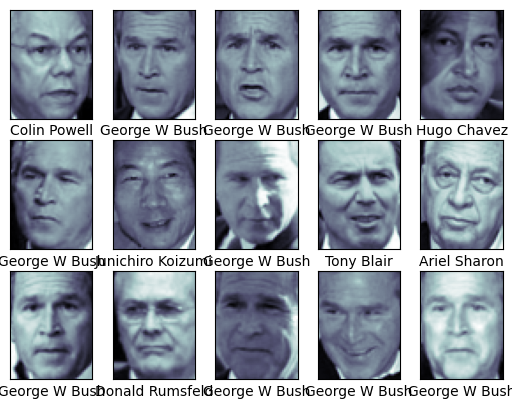

In [4]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC()

model = make_pipeline(pca, svc)


In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)


In [17]:
grid.fit(Xtrain, ytrain)  # Fit the GridSearchCV object
model = grid.best_estimator_  # Access the best estimator found during the grid search
yfit = model.predict(Xtest)

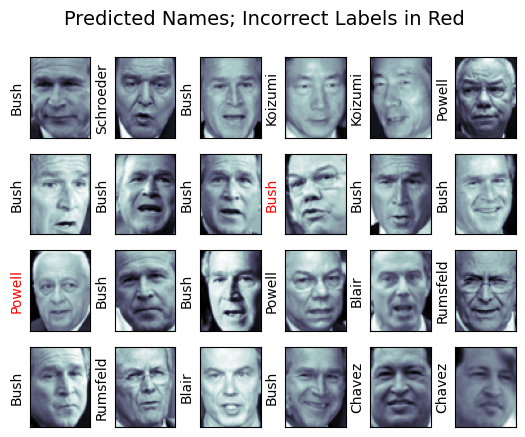

In [18]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.86      0.88      0.87        68
  Donald Rumsfeld       0.85      0.71      0.77        31
    George W Bush       0.82      0.94      0.88       126
Gerhard Schroeder       0.95      0.78      0.86        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.90      0.90      0.90        42

         accuracy                           0.86       337
        macro avg       0.91      0.81      0.85       337
     weighted avg       0.87      0.86      0.86       337



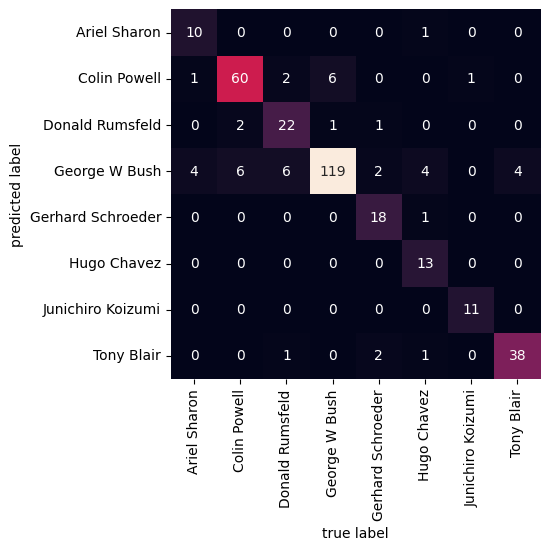

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');